# Phenomenological model constraining: SSC theory

In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc6


In [2]:
import matplotlib

from matplotlib import pyplot as plt

import matplotlib.colors as mcolors

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.pyplot.rc('font', **font)


colors=list(mcolors.TABLEAU_COLORS)


import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:


from jetset.poly_fit_tools import get_SED_pl_fit, get_SED_log_par_fit, get_nu_p_S_delta_approx, get_n_gamma_log_par_fit, get_nu_p_S_delta_approx

In [4]:
def n_distr_plot(j,ax,c=None,gmin=None):
    x=my_jet.electron_distribution.gamma_e
    y=my_jet.electron_distribution.n_gamma_e
    ax.plot(np.log10(x),np.log10(y*x*x*x),color=c)
    if gmin is not None:
        ymax=np.log10(y[0]*x[0]*x[0]*x[0])
        ymin=np.log10(y[-1]*x[-1]*x[-1]*x[-1])
        #print('ymax',ymax)
        ax.vlines(np.log10(gmin),ymin=ymin,ymax=ymax,color=colors[ID])
        

![image.png](../slides/jetset_slides/jetset_slides.007.png)

In [5]:
from jetset.plot_sedfit import PlotSED,PlotPdistr,PlotSpecComp
from jetset.jet_model import Jet

In [6]:
my_jet=Jet(electron_distribution='lppl')
my_jet.parameters.r.val=1.0
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


In [7]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)
my_jet.set_par('r',val=0.4)

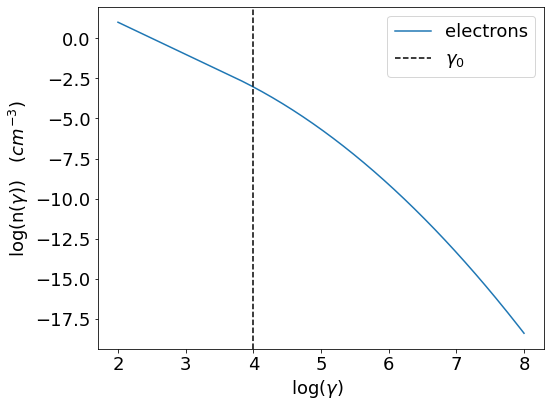

In [8]:
my_jet.eval()
p=my_jet.electron_distribution.plot()
p.ax.axvline(4.0,ls='--',c='black',label=r'$\gamma_0$')
p.ax.legend()

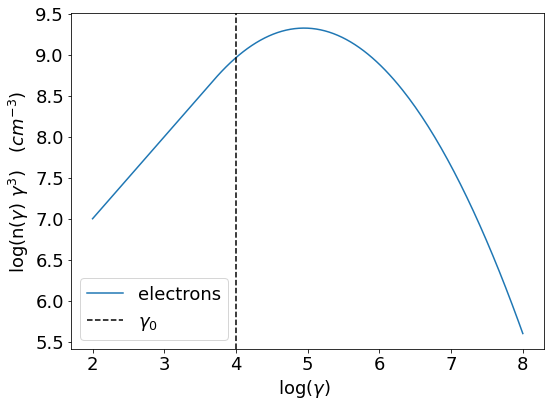

In [9]:
p=my_jet.electron_distribution.plot3p()
p.ax.axvline(4.0,ls='--',c='black',label=r'$\gamma_0$')
p.ax.legend()

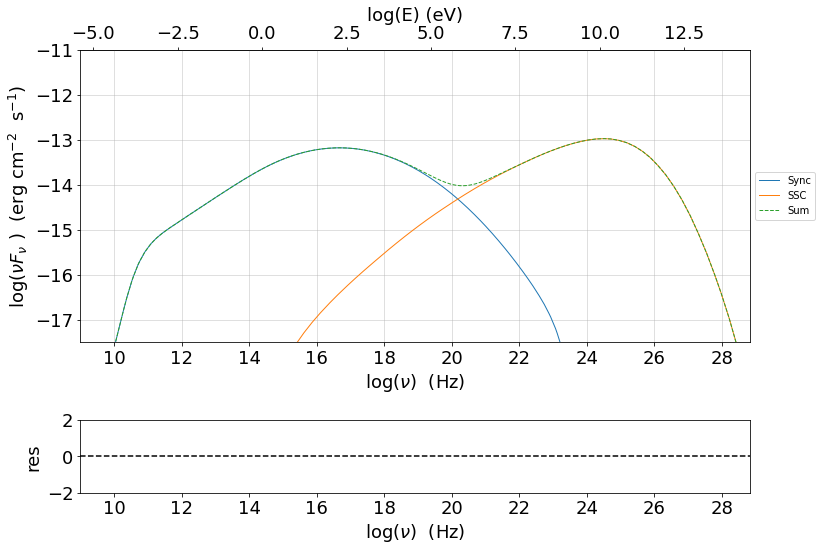

In [10]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=9)

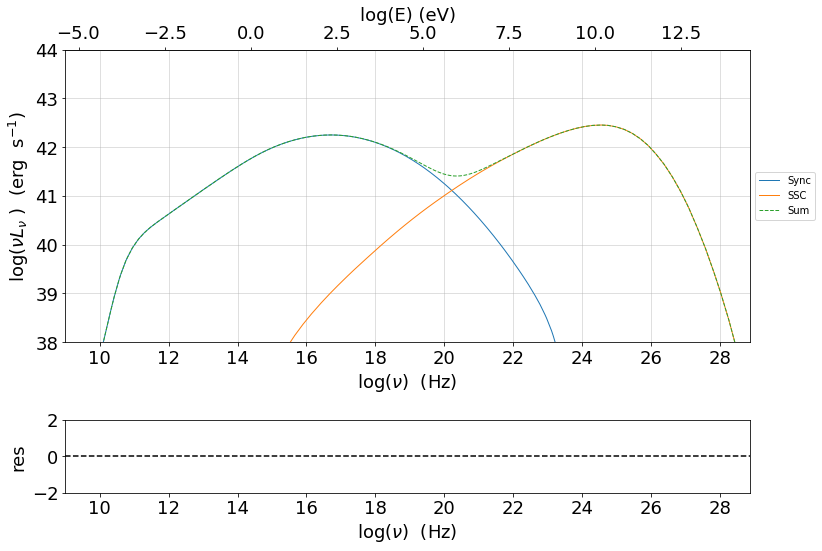

In [11]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=44,y_min=38,x_min=9)

## Synchrotron trends: full computation and  $\delta$-approx comparison

![image.png](../slides/jetset_slides/jetset_slides.008.png)
![image.png](../slides/jetset_slides/jetset_slides.009.png)
![image.png](../slides/jetset_slides/jetset_slides.010.png)
![image.png](../slides/jetset_slides/jetset_slides.011.png)
![image.png](../slides/jetset_slides/jetset_slides.014.png)


### Synchrotron trend for  $\gamma_{min}$  

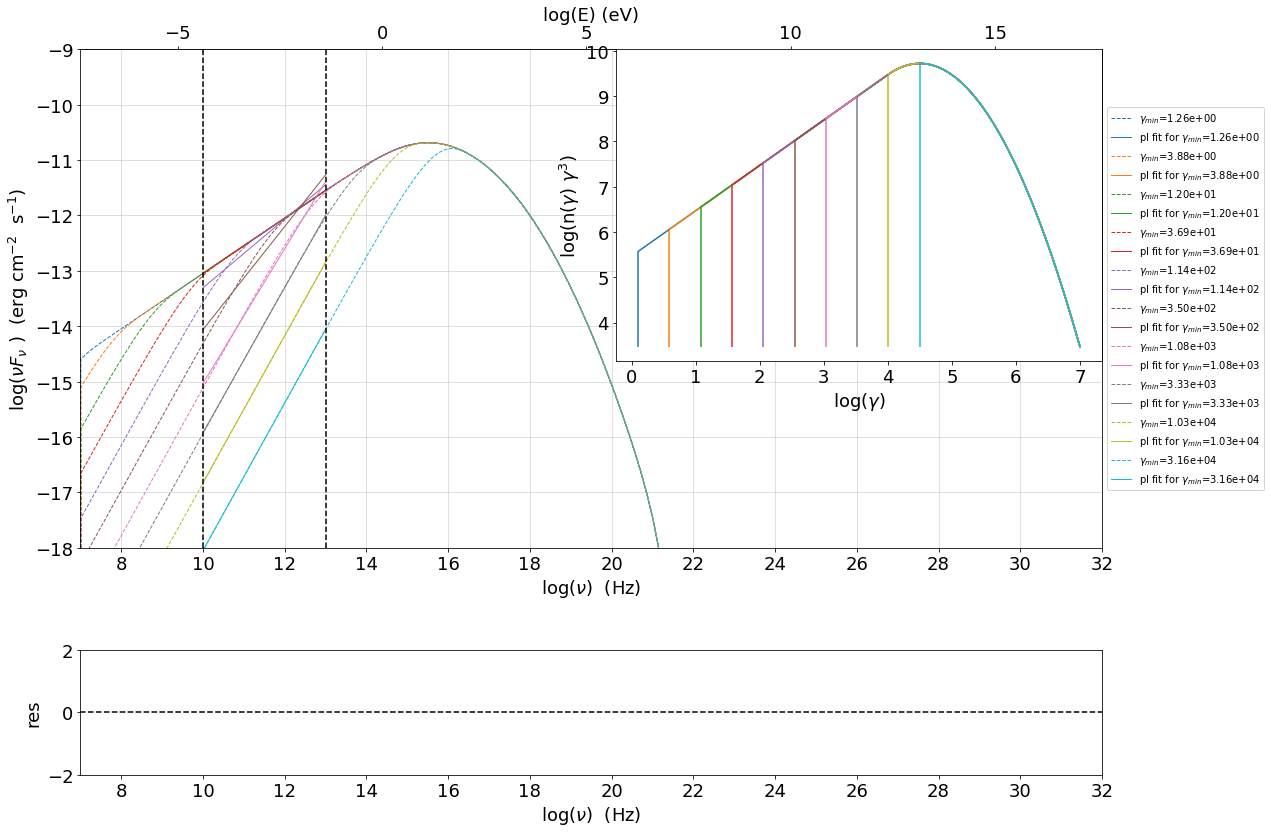

In [12]:
#matplotlib.rc('font', **font)
my_jet=Jet(electron_distribution='lppl')

p=PlotSED(figsize=(18,12))
ax=p.fig.add_subplot(222)
my_jet.parameters.gmax.val=1E7
my_jet.parameters.r.val=1.0
my_jet.parameters.s.val=2.0
my_jet.parameters.N.val=500
my_jet.parameters.z_cosm.val=0.05

my_jet.nu_grid_size=500
my_jet.set_gamma_grid_size(100)
my_jet.set_IC_nu_size(100)

size=10


#Synch
nu_p_S=np.zeros(size)
nuFnu_p_S=np.zeros(size)



S_index=np.zeros(size)
S_index_err=np.zeros(size)

#Switch off SSC emission
my_jet.spectral_components.SSC.state='off'

#Switch off sych self-abs
my_jet.spectral_components.Sync.state='on'

gmin_values=np.logspace(0.1,4.5,size)


 
for ID,gmin in enumerate(gmin_values):
   
   
    my_jet.parameters.gmin.val=gmin
    my_jet.set_N_from_nuFnu(nu_obs=1E18,nuFnu_obs=1E-12)
    my_jet.eval()
    x_p,y_p=my_jet.get_component_peak('Sync',log_log=True)
    S_index[ID],S_index_err[ID],loglog_pl=get_SED_pl_fit(my_jet,'Sync',[10,13])

    
    
    my_jet.plot_model(p,label=r'$\gamma_{min}$=%2.2e'%gmin,color=colors[ID],auto_label=False,comp='Sync',line_style='--')
    p.add_model_plot(loglog_pl,label=r'pl fit for $\gamma_{min}$=%2.2e'%gmin,color=colors[ID],line_style='-')
    n_distr_plot(my_jet,ax,c=colors[ID],gmin=gmin)
    

ax.set_xlabel(r'log($\gamma$)')
ax.set_ylabel(r'log(n($\gamma$) $\gamma^3$)')

p.sedplot.axvline([10],ls='--',c='black')
p.sedplot.axvline([13],ls='--',c='black')

p.sedplot.scatter(nu_p_S,nuFnu_p_S)

p.rescale(y_min=-18,y_max=-9,x_min=7,x_max=32)


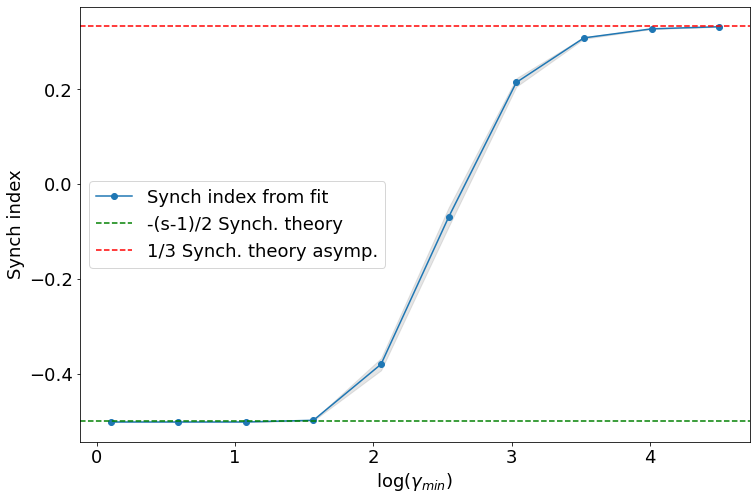

In [13]:
S_spectral_index=S_index-1

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.plot(np.log10(gmin_values),S_spectral_index,'-o',label=r'Synch index from fit')
ax.fill_between(np.log10(gmin_values), S_spectral_index - S_index_err, S_spectral_index + S_index_err,
                 color='gray', alpha=0.2)
ax.set_ylabel('Synch index')
ax.set_xlabel(r'log($\gamma_{min}$)')
ax.axhline(-(my_jet.parameters.s.val-1)/2,ls='--',c='green',label='-(s-1)/2 Synch. theory')
ax.axhline(1/3,ls='--',c='red',label='1/3 Synch. theory asymp.')
ax.legend()



### Synchrotron trend for the low-energy  spectral slope

![image.png](../slides/jetset_slides/jetset_slides.012.png)

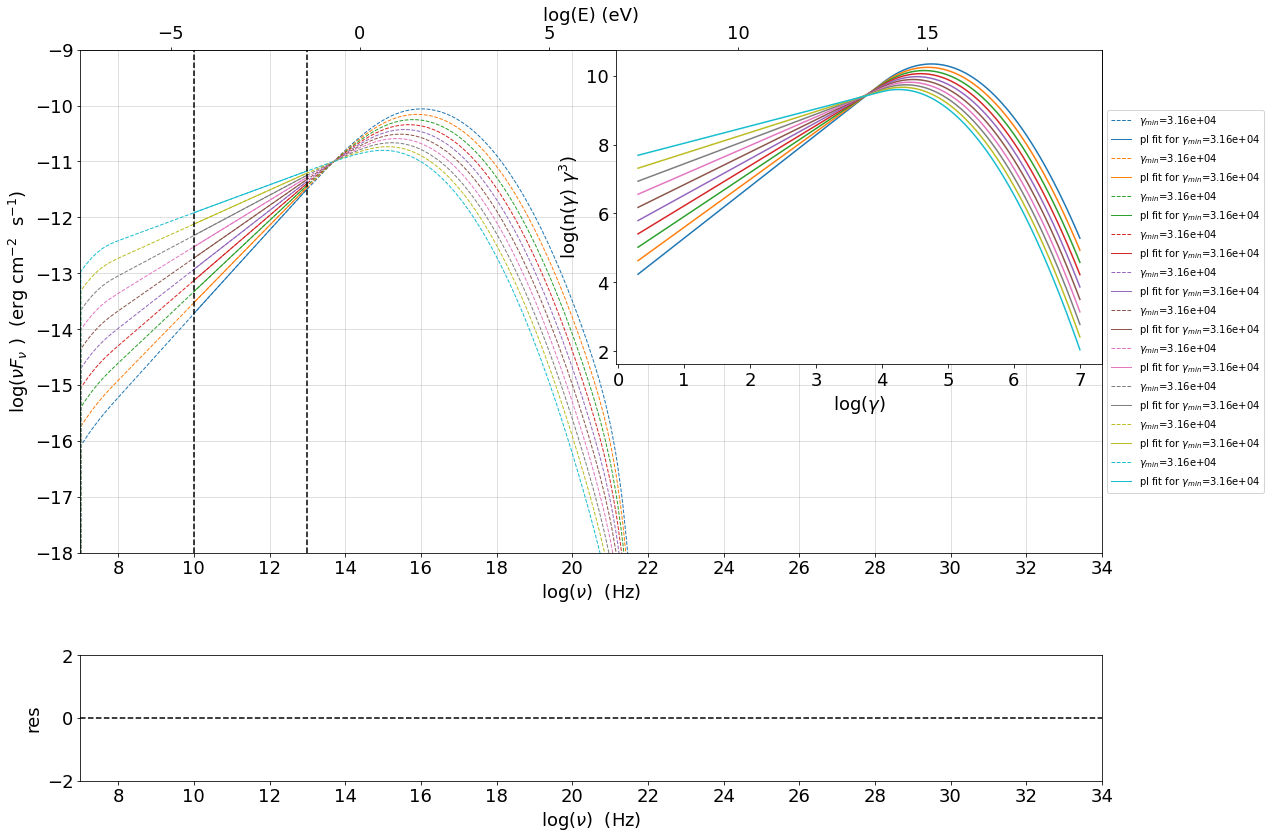

In [14]:
matplotlib.rc('font', **font)

p=PlotSED(figsize=(18,12))
ax=p.fig.add_subplot(222)

my_jet.parameters.gmax.val=1E7
my_jet.parameters.gmin.val=2

my_jet.parameters.r.val=1.0
my_jet.parameters.s.val=2.0
my_jet.parameters.N.val=500
my_jet.parameters.z_cosm.val=0.05

my_jet.nu_grid_size=500
my_jet.set_gamma_grid_size(100)
my_jet.set_IC_nu_size(100)

size=10


#Synch
nu_p_S=np.zeros(size)
nuFnu_p_S=np.zeros(size)



S_index=np.zeros(size)
S_index_err=np.zeros(size)

#Switch off SSC emission
my_jet.spectral_components.SSC.state='off'

#Switch off sych self-abs
my_jet.spectral_components.Sync.state='on'

s_values=np.linspace(1.5,2.5,size)


 
for ID,s in enumerate(s_values):
   
   
    my_jet.parameters.s.val=s
    my_jet.set_N_from_nuFnu(nu_obs=5E13,nuFnu_obs=1E-11)
    my_jet.eval()
    x_p,y_p=my_jet.get_component_peak('Sync',log_log=True)
    S_index[ID],S_index_err[ID],loglog_pl=get_SED_pl_fit(my_jet,'Sync',[10,13])

    
    
    my_jet.plot_model(p,label=r'$\gamma_{min}$=%2.2e'%gmin,color=colors[ID],auto_label=False,comp='Sync',line_style='--')
    p.add_model_plot(loglog_pl,label=r'pl fit for $\gamma_{min}$=%2.2e'%gmin,color=colors[ID],line_style='-')
    n_distr_plot(my_jet,ax,c=colors[ID])


ax.set_xlabel(r'log($\gamma$)')
ax.set_ylabel(r'log(n($\gamma$) $\gamma^3$)')
p.sedplot.axvline([10],ls='--',c='black')

p.sedplot.axvline([13],ls='--',c='black')

p.sedplot.scatter(nu_p_S,nuFnu_p_S)

p.rescale(y_min=-18,y_max=-9,x_min=7,x_max=34)



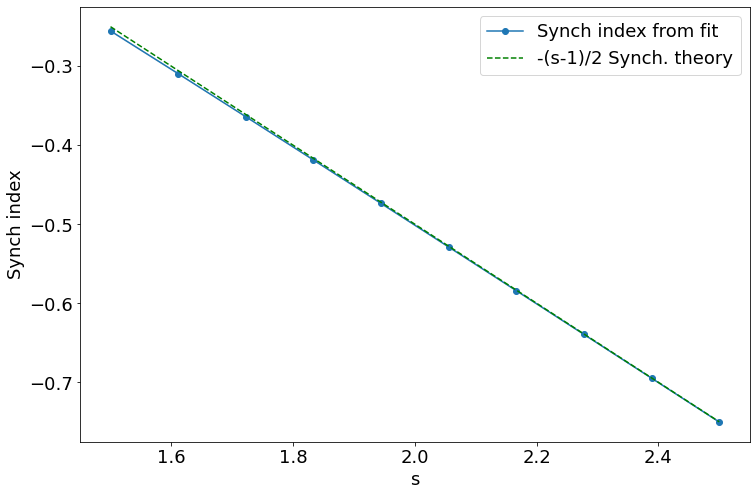

In [15]:
S_spectral_index=S_index-1

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.plot(s_values,S_spectral_index,'-o',label=r'Synch index from fit')
ax.fill_between(s_values, S_spectral_index - S_index_err, S_spectral_index + S_index_err,
                 color='gray', alpha=0.2)
ax.set_ylabel('Synch index')
ax.set_xlabel(r's')
ax.plot(s_values,-(s_values-1)/2,ls='--',c='green',label='-(s-1)/2 Synch. theory')
ax.legend()




### Change in the peak frequency of the SED

![image.png](../slides/jetset_slides/jetset_slides.013.png)

(2.0, 9.0)

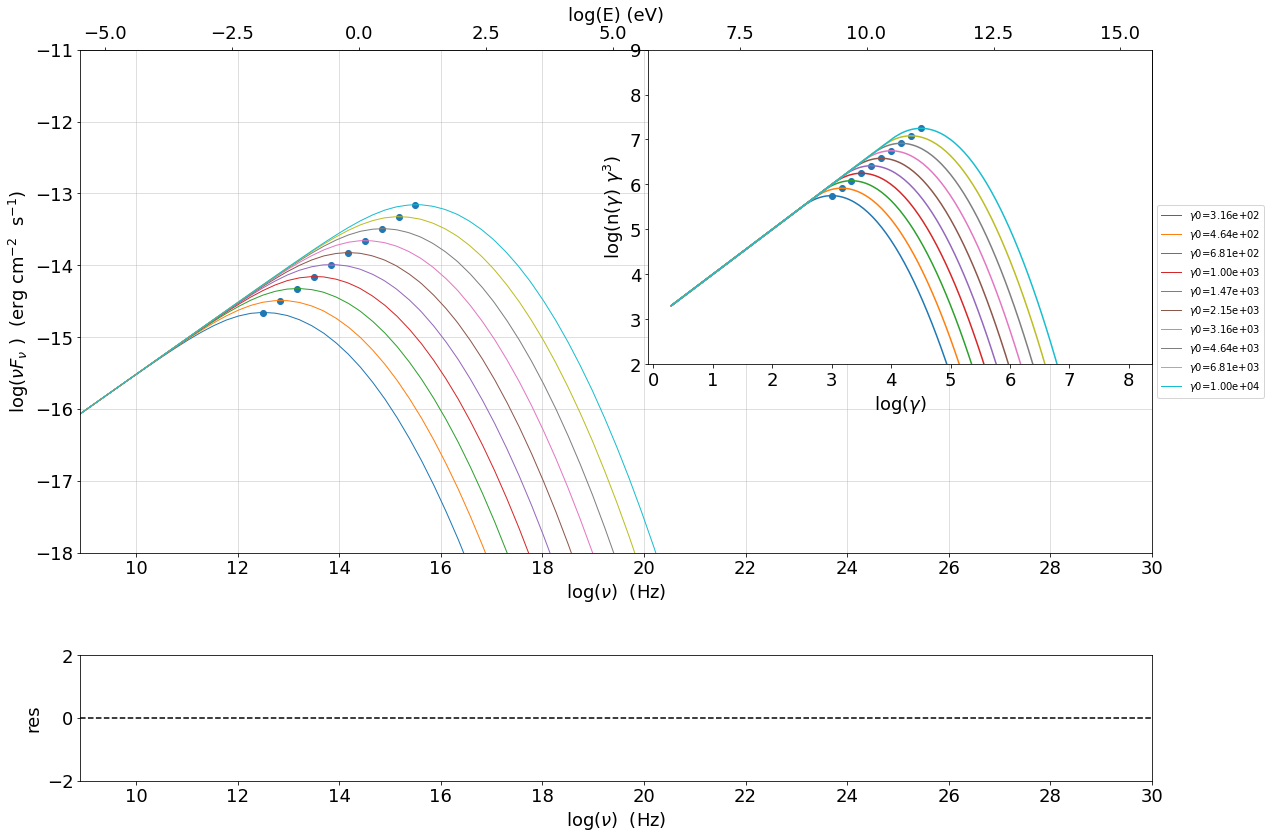

In [16]:
matplotlib.rc('font', **font)

p=PlotSED(figsize=(18,12))
ax=p.fig.add_subplot(222)

my_jet.parameters.gmax.val=1E8
my_jet.parameters.r.val=1.0
my_jet.parameters.s.val=2.0
my_jet.parameters.N.val=500
my_jet.parameters.z_cosm.val=0.05


size=10


#Synch
nu_p_S=np.zeros(size)
nuFnu_p_S=np.zeros(size)
nu_p_S_delta=np.zeros(size)


#e- distr 
g_p_e=np.zeros(size)
n3g_p_e=np.zeros(size)


#Switch off SSC emission
my_jet.spectral_components.SSC.state='off'

for ID,gamma0_log_parab in enumerate(np.logspace(2.5,4,size)):
   
    my_jet.nu_grid_size=100
    my_jet.set_gamma_grid_size(200)
    my_jet.parameters.gamma0_log_parab.val=gamma0_log_parab
    my_jet.eval()
    x_p,y_p=my_jet.get_component_peak('Sync',log_log=True)
    (nu_p_S[ID],nuFnu_p_S[ID],_),err=get_SED_log_par_fit(x_p,y_p,my_jet,'Sync')
    my_jet.electron_distribution.update()
    pars,err=get_n_gamma_log_par_fit(my_jet.electron_distribution,power=3,delta_p=[-0.25,0.25])
    g_p_e[ID] = pars[0]
    n3g_p_e[ID] = pars[1]
    nu_p_S_delta[ID]=get_nu_p_S_delta_approx(my_jet,g_p_e[ID])
    
    my_jet.plot_model(p,label=r'$\gamma 0$=%2.2e'%gamma0_log_parab,color=colors[ID],auto_label=False,comp='Sync')
    
    n_distr_plot(my_jet,ax,c=colors[ID])
    
    
ax.set_xlabel(r'log($\gamma$)')
ax.set_ylabel(r'log(n($\gamma$) $\gamma^3$)')

p.sedplot.scatter(nu_p_S,nuFnu_p_S)
ax.scatter(g_p_e,n3g_p_e)

p.rescale(y_min=-18,y_max=-11,x_min=8.9,x_max=30)
ax.set_ylim(2,9)

(0.0, 1.5)

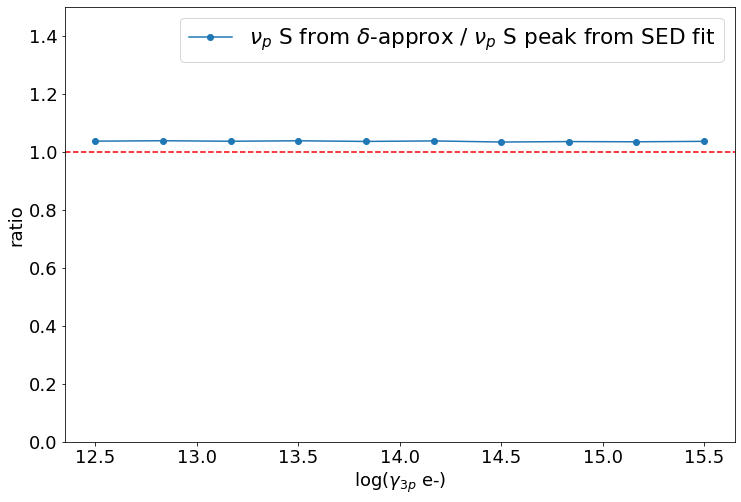

In [17]:
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.plot(nu_p_S,10**(nu_p_S - nu_p_S_delta),'-o',label=r'$\nu_p$ S from $\delta$-approx / $\nu_p$ S peak from SED fit')

ax.set_ylabel('ratio')
ax.set_xlabel(r'log($\gamma_{3p}$ e-)')
#ax.axvline(4.0,ls='--',c='black')
ax.axhline(1.0,ls='--',c='red')
ax.legend(fontsize='large',loc='best')
ax.set_ylim(0,1.5)


## Trends for the inverse Compton and synchrotron emission

![image.png](../slides/jetset_slides/jetset_slides.015.png)


### Changing $\gamma_{min}$

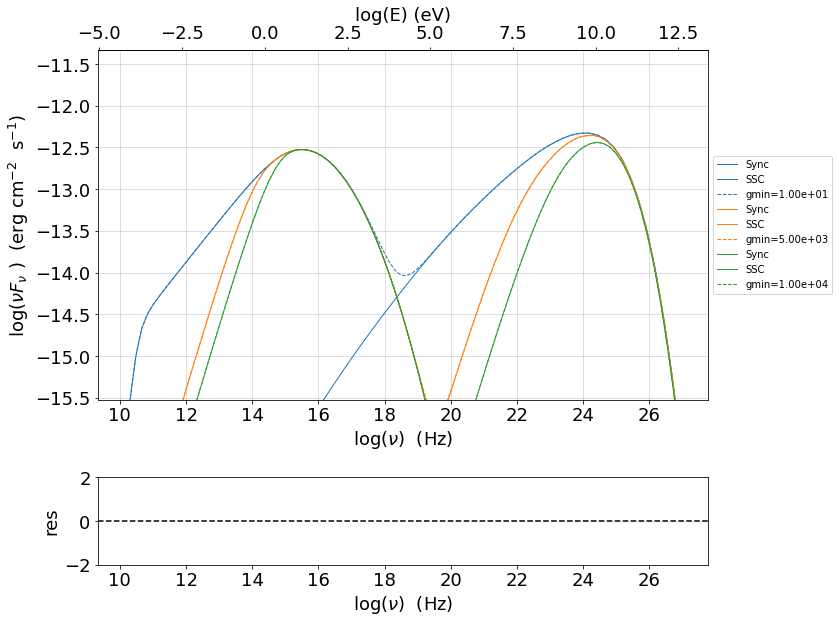

In [18]:
matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9))


my_jet=Jet(electron_distribution='lppl')

my_jet.parameters.gmax.val=1E8
my_jet.parameters.r.val=1.0


for ID,gmin in enumerate([10,5000,10000]):
   
    my_jet.set_gamma_grid_size(200)
    my_jet.set_IC_nu_size(100)
    my_jet.parameters.gmin.val=gmin
    my_jet.set_N_from_nuFnu(nu_obs=1E17,nuFnu_obs=1E-13)
    my_jet.eval()
    my_jet.plot_model(p,label='gmin=%2.2e'%gmin,color=colors[ID])


### Changing the turn-over energy

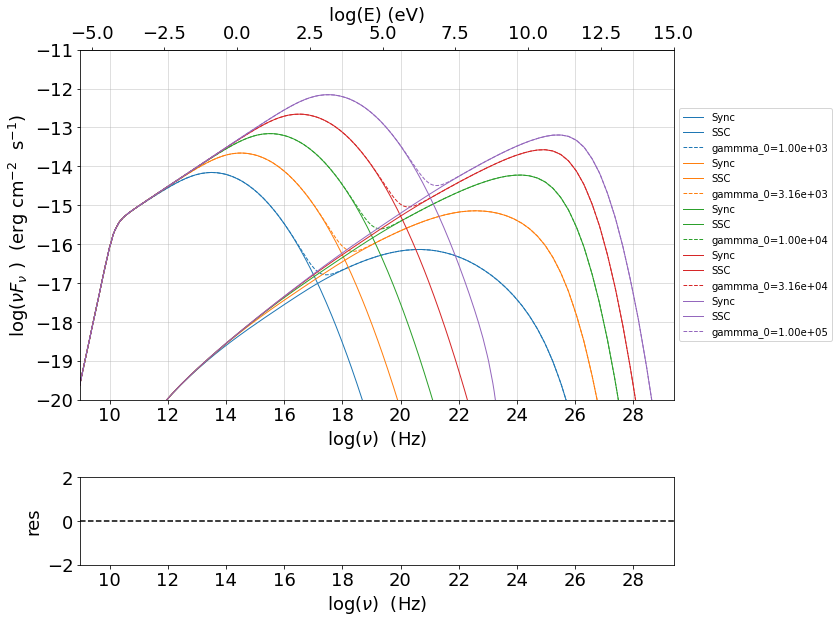

In [19]:
my_jet=Jet(electron_distribution='lppl')

matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9))

my_jet.parameters.gmax.val=1E8
my_jet.parameters.r.val=1.0
my_jet.parameters.s.val=2.0
my_jet.parameters.N.val=500
my_jet.parameters.z_cosm.val=0.05


my_jet.nu_grid_size=1000
my_jet.set_gamma_grid_size(200)
my_jet.set_IC_nu_size(100)
for ID,gamma0_log_parab in enumerate(np.logspace(3,5,5)):
   
    
    my_jet.parameters.gamma0_log_parab.val=gamma0_log_parab
    my_jet.eval()
    my_jet.plot_model(p,label='gammma_0=%2.2e'%gamma0_log_parab,color=colors[ID])
    
p.rescale(y_min=-20,y_max=-11,x_min=9)

### The IC redistribution function

![image.png](../slides/jetset_slides/jetset_slides.016.png)


In [20]:
from jetset.jetkernel import jetkernel

def eval_nu_min_max(nu_compton_0,g):
    epsilon_0 = jetkernel.HPLANCK * nu_compton_0*jetkernel.one_by_MEC2
    nu_1_max = 4.0 * nu_compton_0 * g*g / (1.0 + 4.0*g*epsilon_0)
    nu_1_min = nu_compton_0/(4.0*g*g)
    Gamma=4*nu_0*g*jetkernel.one_by_MEC2*jetkernel.HPLANCK
    return nu_1_min, nu_1_max,Gamma

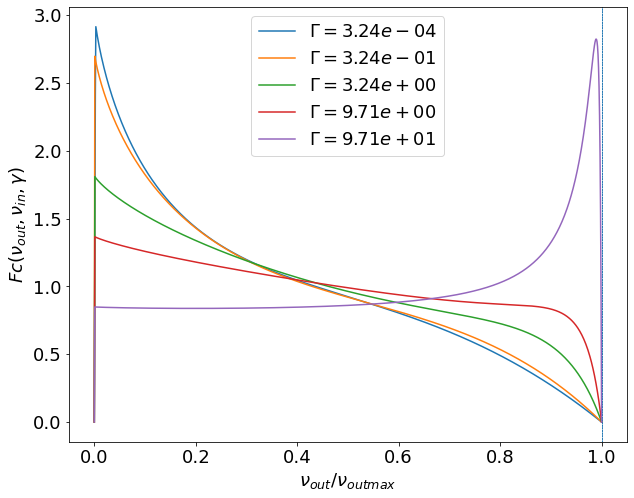

In [21]:
# Compare with fig. 4 in BLUMENTHAL, GEORGE R. GOULD, ROBERT J. 1970
# https://ui.adsabs.harvard.edu/abs/1970RvMP...42..237B/abstract
plt.figure(figsize=(10,8))
my_jet=Jet()
nu_0=1E15
size=1000

rate=np.zeros(size)
my_jet._blob.do_IC_down_scattering=1
for g in [1E1,1E4,1E5,3E5,3E6]:
    nu_1_min,nu_1_max,Gamma=eval_nu_min_max(nu_0,g)
    nu_1_range=np.linspace( nu_1_min , nu_1_max,size)
    rate=np.zeros(size)
    for ID,nu_1 in enumerate(nu_1_range):
        my_jet._blob.nu_compton_0=nu_0
        my_jet._blob.nu_1=nu_1   
        rate[ID]=jetkernel.f_compton_K1(my_jet._blob,g)
    
    x=nu_1_range/nu_1_max
    y=rate
    c=np.trapz(y,x)
    plt.plot(x, rate/c,label=r'$\Gamma=%2.2e$'%(Gamma))
    plt.axvline(1.0,ls='--',lw=0.5)
    plt.legend()
    plt.xlabel(r'$\nu_{out}/\nu_{out max}$')
    plt.ylabel(r'$Fc(\nu_{out},\nu_{in},\gamma)$')

Text(0, 0.5, '$\\frac{h\\nu_{out}}{\\gamma_e m_ec^2}$')

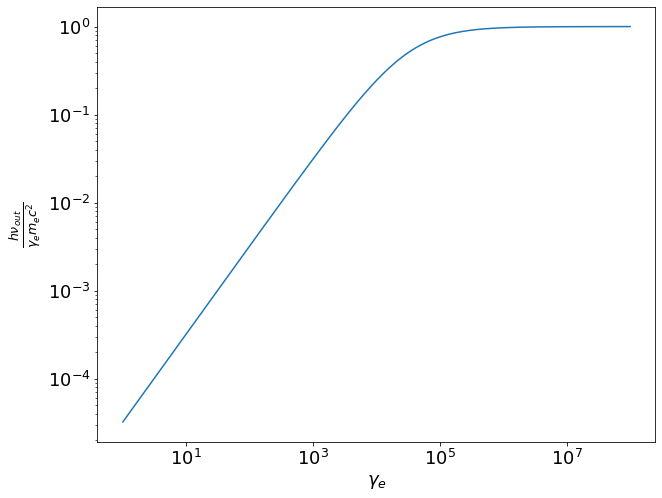

In [22]:
plt.figure(figsize=(10,8))
x=np.logspace(0,8,1000)
_,y,_=eval_nu_min_max(1E15,x)
plt.loglog(x,jetkernel.HPLANCK*y*jetkernel.one_by_MEC2/x)
plt.xlabel(r'$\gamma_e}$')
plt.ylabel(r'$\frac{h\nu_{out}}{\gamma_e m_ec^2}$')

### Transition from TH to KN regime for the IC emission: changing the curvature in the high-enegy branch of the emitters

![image.png](../slides/jetset_slides/jetset_slides.018.png)


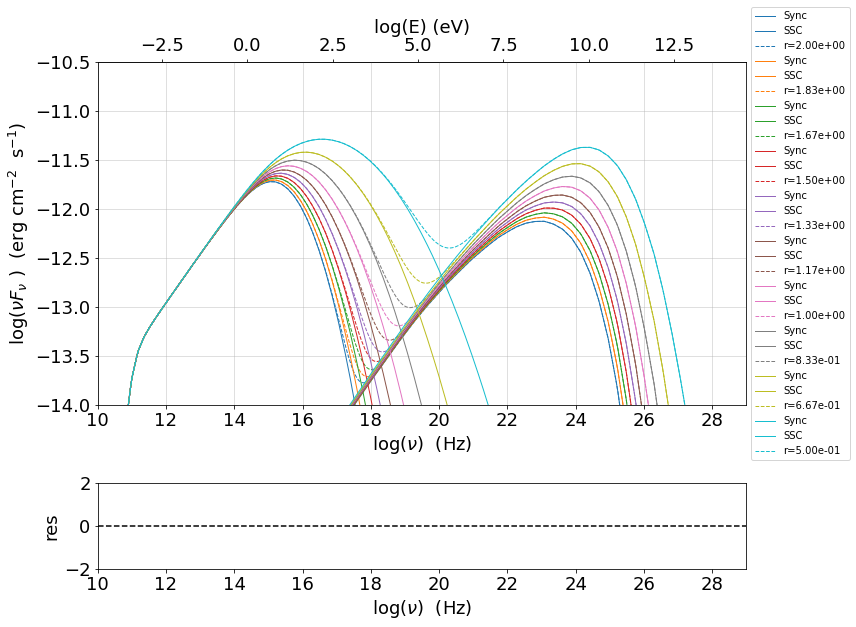

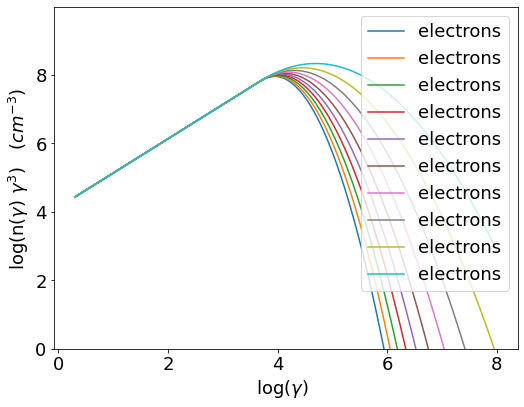

In [23]:
my_jet=Jet(electron_distribution='lppl')

matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9))
pe=PlotPdistr()
pe.fig.set_size_inches(8,6)
my_jet.parameters.gmax.val=1E8
my_jet.parameters.gamma0_log_parab.val=5E3
my_jet.parameters.B.val=.5

my_jet.nu_max=1E30
my_jet.set_gamma_grid_size(100)
my_jet.set_IC_nu_size(100)

size=10

nu_p_S=np.zeros(size)
nu_p_IC=np.zeros(size)
nuFnu_p_S=np.zeros(size)
nuFnu_p_IC=np.zeros(size)
r_S=np.zeros(size)
r_S_err=np.zeros(size)
r_IC=np.zeros(size)
r_IC_err=np.zeros(size)
r_values=np.linspace(2.0,0.5,size)



for ID,r in enumerate(r_values):
   
    
    my_jet.parameters.r.val=r
    my_jet.set_N_from_nuFnu(nu_obs=1E10,nuFnu_obs=1E-14)
    my_jet.eval()
    my_jet.plot_model(p,label='r=%2.2e'%r,color=colors[ID])
    x_p,y_p=my_jet.get_component_peak('Sync',log_log=True)
    (nu_p_S[ID],nuFnu_p_S[ID],r_S[ID]),err=get_SED_log_par_fit(x_p,y_p,my_jet,'Sync',delta_p=[0,1])
    r_S_err[ID]=err[2]
    
    x_p,y_p=my_jet.get_component_peak('SSC',log_log=True)
    (nu_p_IC[ID],nuFnu_p_IC[ID],r_IC[ID]),err=get_SED_log_par_fit(x_p,y_p,my_jet,'SSC',delta_p=[0,1])
    r_IC_err[ID]=err[2]
    my_jet.electron_distribution.plot3p(pe)
    
    
p.rescale(y_min=-14,y_max=-10.5,x_min=10,x_max=29)
pe.rescale(y_min=0)

the following plot shows the trend for the S curvature (b) and the IC curvature (both measured over one decade starting from the peak) versus the curvature of the electron distribution (r) 

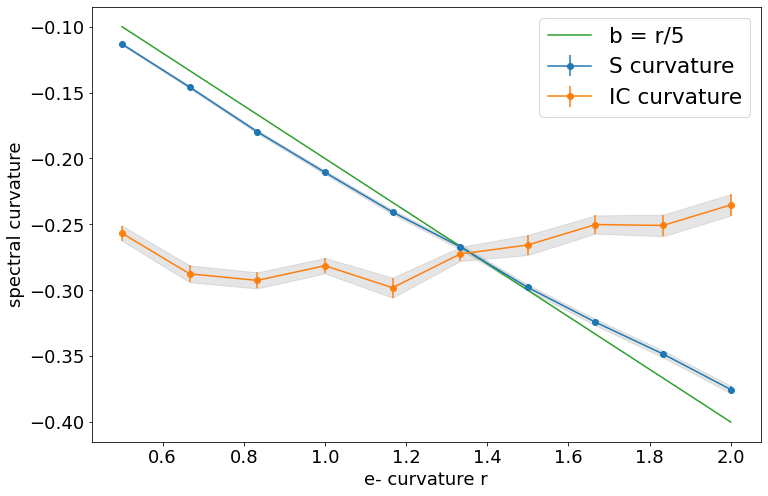

In [24]:
fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.errorbar(r_values,r_S,yerr=r_S_err,fmt='-o',label='S curvature')
ax.fill_between(r_values, r_S - r_S_err, r_S + r_S_err,
                 color='gray', alpha=0.2)
ax.errorbar(r_values,r_IC,yerr=r_IC_err,fmt='-o',label='IC curvature')
ax.fill_between(r_values, r_IC - r_IC_err, r_IC + r_IC_err,
                 color='gray', alpha=0.2)

ax.plot(r_values,-r_values/5, label='b = r/5')
ax.set_ylabel('spectral curvature')
ax.set_xlabel(r'e- curvature r')
#ax.axvline(,ls='--',c='black')
#ax.axhline(-0.2,ls='--',c='red',label='sync theor. b~r/5')
ax.legend(fontsize='large')

### Transition from TH to KN regime for the IC emission: changing the turnover energy

![image.png](../slides/jetset_slides/jetset_slides.019.png)


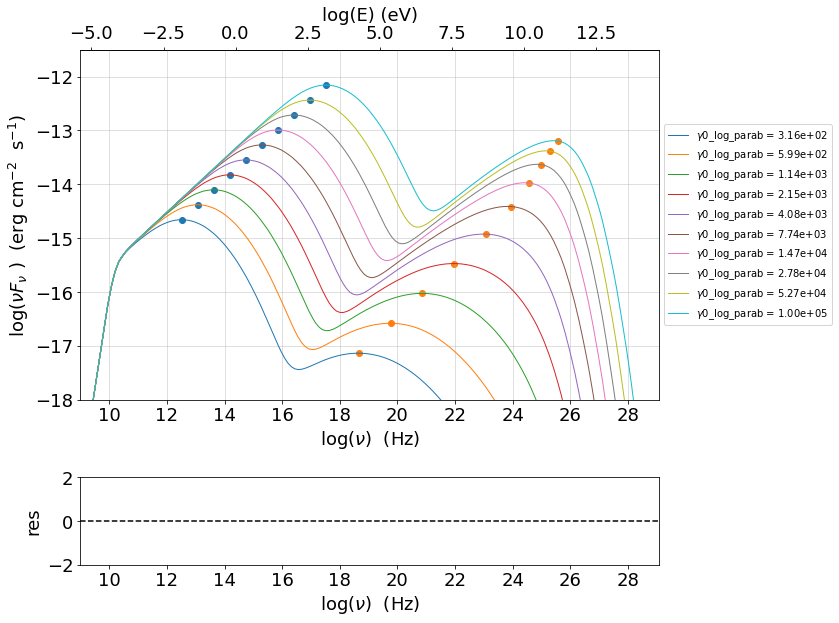

In [25]:
    
my_jet=Jet(electron_distribution='lppl')

matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9))

size=10

my_jet.parameters.gmax.val=1E8
my_jet.parameters.r.val=1.0
my_jet.parameters.s.val=2.0
my_jet.parameters.N.val=500
my_jet.parameters.z_cosm.val=0.05

my_jet.nu_grid_size=200
my_jet.set_gamma_grid_size(200)
my_jet.set_IC_nu_size(200)

nu_p_S=np.zeros(size)
nu_p_IC=np.zeros(size)
nuFnu_p_S=np.zeros(size)
nuFnu_p_IC=np.zeros(size)
r_S=np.zeros(size)
r_S_err=np.zeros(size)
r_IC=np.zeros(size)
r_IC_err=np.zeros(size)
g_p_e=np.zeros(size)
n3g_p_e=np.zeros(size)

#colors=list(mcolors.CSS4_COLORS)


for ID,gamma0_log_parab in enumerate(np.logspace(2.5,5,size)):
   
   
    my_jet.parameters.gamma0_log_parab.val=gamma0_log_parab
    my_jet.eval()
    my_jet.plot_model(p,comp='Sum',label='$\gamma0$_log_parab = %2.2e'%gamma0_log_parab)
    #with log_log=True, the values are already logarthmic
    x_p,y_p=my_jet.get_component_peak('Sync',log_log=True)
    (nu_p_S[ID],nuFnu_p_S[ID],r_S[ID]),err=get_SED_log_par_fit(x_p,y_p,my_jet,'Sync', delta_p=[0,1])
    r_S_err[ID]=err[2]
    
    x_p,y_p=my_jet.get_component_peak('SSC',log_log=True)
    (nu_p_IC[ID],nuFnu_p_IC[ID],r_IC[ID]),err=get_SED_log_par_fit(x_p,y_p,my_jet,'SSC', delta_p=[0,1])
    r_IC_err[ID]=err[2]
    pars,err=get_n_gamma_log_par_fit(my_jet.electron_distribution,power=3,delta_p=[-0.5,0.5])
    g_p_e[ID] = pars[0]
    n3g_p_e[ID] = pars[1]
    
p.rescale(y_min=-18,y_max=-11.5,x_min=9)

p.sedplot.scatter(nu_p_S,nuFnu_p_S)
p.sedplot.scatter(nu_p_IC,nuFnu_p_IC)


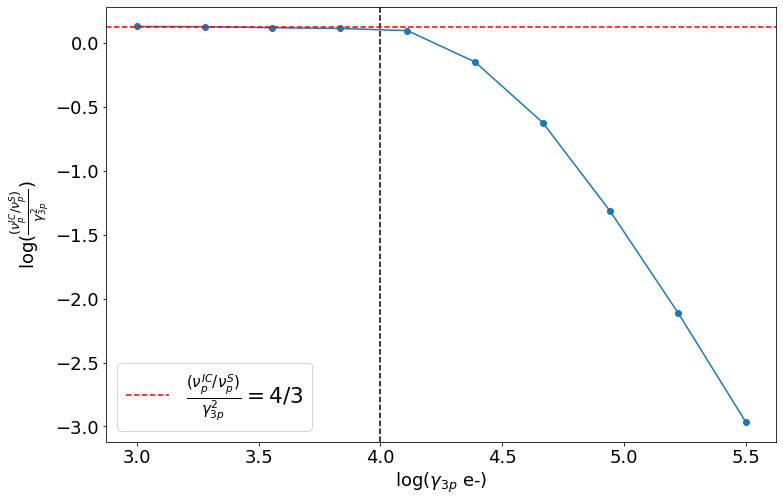

In [26]:
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.plot(g_p_e,(nu_p_IC-nu_p_S)-2*g_p_e,'-o')
ax.set_ylabel(r'log($ \frac{(\nu_p^{IC} / \nu_p^{S})}{\gamma_{3p}^2} $)''')
ax.set_xlabel(r'log($\gamma_{3p}$ e-)')
ax.axvline(4.0,ls='--',c='black')
ax.axhline(np.log10(4/3),ls='--',c='red',label=r"$ \frac{(\nu_p^{IC} / \nu_p^{S})}{\gamma_{3p}^2} =4/3 $")
ax.legend(fontsize='large',loc='lower left')

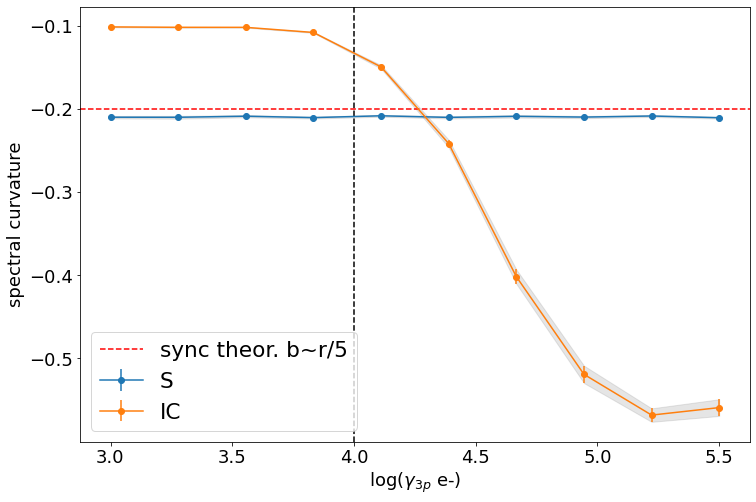

In [27]:
fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.errorbar(g_p_e,r_S,yerr=r_S_err,fmt='-o',label='S')
ax.fill_between(g_p_e, r_S - r_S_err, r_S + r_S_err,
                 color='gray', alpha=0.2)
ax.errorbar(g_p_e,r_IC,yerr=r_IC_err,fmt='-o',label='IC')
ax.fill_between(g_p_e, r_IC - r_IC_err, r_IC + r_IC_err,
                 color='gray', alpha=0.2)
ax.set_ylabel('spectral curvature')
ax.set_xlabel(r'log($\gamma_{3p}$ e-)')
ax.axvline(4.0,ls='--',c='black')
ax.axhline(-0.2,ls='--',c='red',label='sync theor. b~r/5')
ax.legend(fontsize='large')

## Exercise
derive the trend for the Compton dominance (CD) as a function of N a gamma0_log_parab

hint: use the get_component_peak to extract the peak of the SED for each component